
# Day 4/7 – Feature Engineering & Data Transformation 

## Dataset
**Google Play Store Apps**  
https://www.kaggle.com/datasets/lava18/google-play-store-apps

## Objective
Transform raw, messy app data into analysis-ready features using Python.
Focus on:
- Data cleaning
- Feature engineering
- Business-ready transformations

## Tools
- Python
- Pandas, NumPy
- Matplotlib, Seaborn


In [1]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:

# Load dataset
df = pd.read_csv("googleplaystore.csv")

# Create an explicit copy to avoid chained assignment warnings
df = df.copy()

df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:

# Basic overview
df.shape


(10841, 13)

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB



## Data Cleaning
- Remove duplicates
- Handle missing values safely


In [5]:

# Remove duplicates
df = df.drop_duplicates().copy()


In [6]:

# Handle missing values using .loc (safe assignment)
df.loc[:, "Rating"] = df["Rating"].fillna(df["Rating"].median())
df.loc[:, "Type"] = df["Type"].fillna("Free")
df.loc[:, "Content Rating"] = df["Content Rating"].fillna("Unknown")



## Feature Engineering


In [7]:

# Convert Installs to numeric
df.loc[:, "Installs"] = (
    df["Installs"]
    .astype(str)
    .str.replace(r"[+,]", "", regex=True)
)

df.loc[:, "Installs"] = pd.to_numeric(df["Installs"], errors="coerce")


In [8]:

# Convert Price to numeric
df.loc[:, "Price"] = (
    df["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
)

df.loc[:, "Price"] = pd.to_numeric(df["Price"], errors="coerce")


In [9]:

# Convert Size to MB
def size_to_mb(size):
    if isinstance(size, str):
        if size.endswith("M"):
            return float(size.replace("M", ""))
        elif size.endswith("k"):
            return float(size.replace("k", "")) / 1024
    return np.nan

df.loc[:, "Size_MB"] = df["Size"].map(size_to_mb)


In [10]:
df.loc[:, "Last Updated"] = pd.to_datetime(
    df["Last Updated"].astype(str),
    errors="coerce"
)

In [11]:

# Business features
df.loc[:, "Is_Paid"] = np.where(df["Type"] == "Paid", 1, 0)

df.loc[:, "Rating_Category"] = pd.cut(
    df["Rating"],
    bins=[0, 2, 3, 4, 5],
    labels=["Poor", "Average", "Good", "Excellent"]
)



## Quick Insights


In [12]:

# Average rating by app type
df.groupby("Type")["Rating"].mean()


Type
0       19.00000
Free     4.19852
Paid     4.26915
Name: Rating, dtype: float64

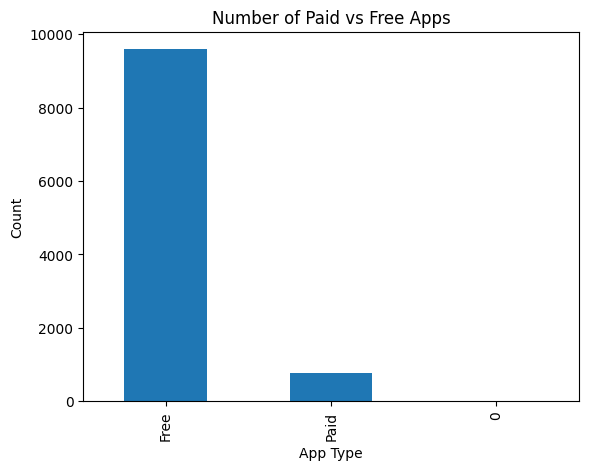

In [13]:
plt.figure()
df["Type"].value_counts().plot(kind="bar")
plt.title("Number of Paid vs Free Apps")
plt.xlabel("App Type")
plt.ylabel("Count")
plt.show()


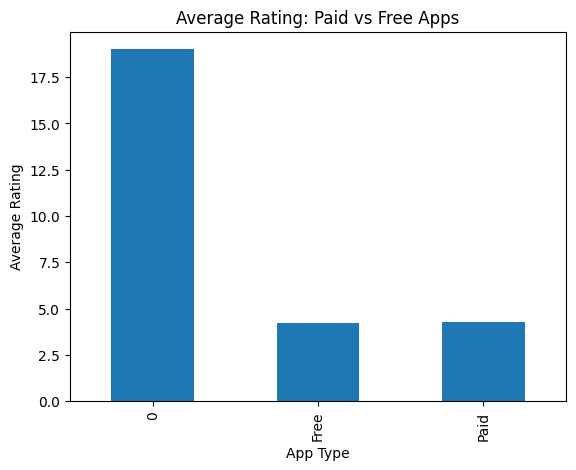

In [14]:
avg_rating = df.groupby("Type")["Rating"].mean()

plt.figure()
avg_rating.plot(kind="bar")
plt.title("Average Rating: Paid vs Free Apps")
plt.xlabel("App Type")
plt.ylabel("Average Rating")
plt.show()


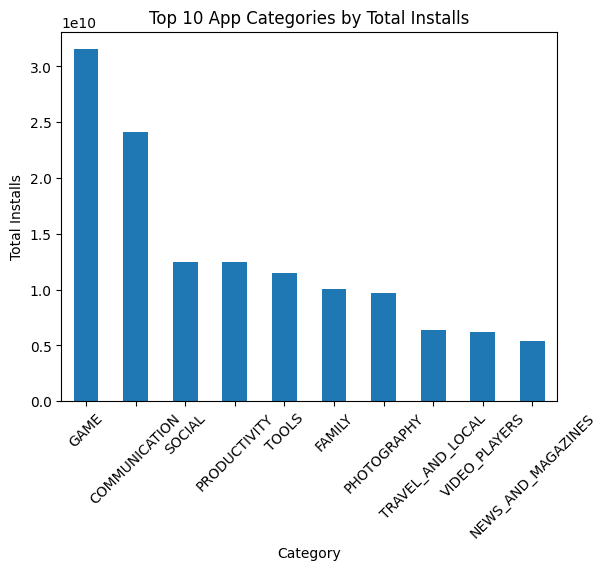

In [15]:
top_categories = (
    df.groupby("Category")["Installs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_categories.plot(kind="bar")
plt.title("Top 10 App Categories by Total Installs")
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.xticks(rotation=45)
plt.show()



## Save Clean Dataset


In [16]:

df.to_csv("google_play_store_feature_engineered.csv", index=False)



## Key Learnings
- Used `.copy()` and `.loc` to avoid chained assignment warnings
- Converted raw text fields into numeric values
- Created business-ready features for analysis

## Conclusion

In this analysis, I focused on transforming raw Google Play Store app data into an analysis-ready dataset through systematic data cleaning and feature engineering. By handling missing values, correcting data types, and creating meaningful features such as install counts, app size in MB, paid vs free indicators, and update-based time features, the dataset became more reliable and business-usable.

The engineered features enabled clearer insights into app distribution, user preferences, and category-level demand. Visual analysis highlighted the dominance of free apps on the platform, differences in average ratings between paid and free apps, and categories that attract the highest number of installs.

Overall, this project reinforced the importance of feature engineering as a critical step in the data analysis pipeline. Clean and well-structured features not only simplify analysis but also lay the foundation for accurate insights and downstream modeling. This step bridges the gap between raw data and actionable decision-making.